# `ALLIN PODCAST ANALYSIS (DATASCIENCE PR)`

# Packages and Theme

In [1]:
import sys
!{sys.executable} -m pip install pandas-profiling


You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [20]:
import json

from dateutil import parser
from pandas_profiling import ProfileReport

import pandas as pd
import matplotlib.pyplot as plt


#importing the style package
from matplotlib import style

#Theme
plt.style.use('seaborn')

#color styles
highColor = "#6930C3"
lowColor = "#EB596E"

#print(plt.style.available)

# Load Data

In [3]:
#load and format data
file = "all-in_podcast.json"
data = None
with open(file, 'r') as f:
    data = json.load(f)

channel_id, stats = data.popitem()

channel_stats = stats["channel_statistics"]
video_stats = stats["video_data"]

In [17]:
video_stats

{'M3UjMit3xGY': {'publishedAt': '2023-01-06T11:20:30Z',
  'title': 'E110: 2023 Bestie Predictions!',
  'channelId': 'UCESLZhusAkFfsNsApnjF_Cg',
  'description': "(0:00) Bestie New Year catch-up!\n(2:44) Prediction 1: 2023's biggest political winner\n(17:25) Prediction 2: 2023's biggest political loser\n(21:57) Prediction 3: 2023's biggest business winner\n(30:34) Prediction 4: 2023's biggest business loser\n(42:03) Prediction 5: 2023's biggest business deal\n(52:41) Prediction 6: 2023's most contrarian belief\n(1:03:03) Prediction 7: 2023's best-performing asset\n(1:07:50) Prediction 8: 2023's worst-performing asset\n(1:14:46) Prediction 9: 2023's most anticipated trend\n(1:21:40) Prediction 10: 2023's most anticipated media\n(1:27:07) OpenAI reportedly in talks to sell existing shares at a ~$29B valuation\n\nFollow the besties: \nhttps://twitter.com/chamath\nhttps://linktr.ee/calacanis\nhttps://twitter.com/DavidSacks\nhttps://twitter.com/friedberg\n\nFollow the pod:\nhttps://twitter.c

# Channel Statistics

In [29]:
#Video statistics, sort videos by views
sorted_vids = sorted(video_stats.items(), key=lambda item: int(item[1]["viewCount"]), reverse=True)


stats = []
for vid in sorted_vids:
    video_id = vid[0]
    title = vid[1]["title"]
    views = int(vid[1]["viewCount"])
    likes = int(vid[1]["likeCount"])
    comments = int(vid[1]["commentCount"])
    timestamp = parser.parse(vid[1]["publishedAt"])
    
    
    stats.append([title,views,likes,comments,timestamp])

#create dataframe
df = pd.DataFrame(stats, columns=["title", "views", "likes", "comments", "timestamp"])

#Channel Statistics
total_views = int(channel_stats["viewCount"])
total_subscribers = int(channel_stats["subscriberCount"])
total_videos = int(channel_stats["videoCount"])

print("\nSummary Stats\n")
print(f"Total Views: {total_views:,} \nTotal Subs: {total_subscribers:,} \nTotal Videos: {total_videos:,}")
print(f"Total Channel Likes: {df['likes'].sum():,}")
print(f"Total Channel Comments: {df['comments'].sum():,}")

print(f"\nAverage Summary\n")
avg_views = round(df['views'].mean(),2)
avg_likes = round(df['likes'].mean(),2)
avg_comments = round(df['comments'].mean(),2)
print(f"Average Views per video: {avg_views:,}")
print(f"Average Likes per video: {avg_likes:,}")
print(f"Average Comments per video: {avg_comments:,}")


Summary Stats

Total Views: 22,277,726 
Total Subs: 298,000 
Total Videos: 132
Total Channel Likes: 554,978
Total Channel Comments: 121,920

Average Summary

Average Views per video: 169,739.97
Average Likes per video: 4,236.47
Average Comments per video: 930.69


# Top 10 Video with most Views

In [5]:
df.describe()

,views,likes,comments
count,1.310000e+02,131.000000,131.000000
mean,1.697400e+05,4236.473282,930.687023
std,2.103319e+05,5062.483034,839.380981
min,9.544000e+03,227.000000,34.000000
25%,8.095150e+04,2238.000000,362.000000
50%,1.343600e+05,3468.000000,747.000000
75%,2.275625e+05,5294.000000,1219.500000
max,2.297902e+06,55466.000000,6769.000000


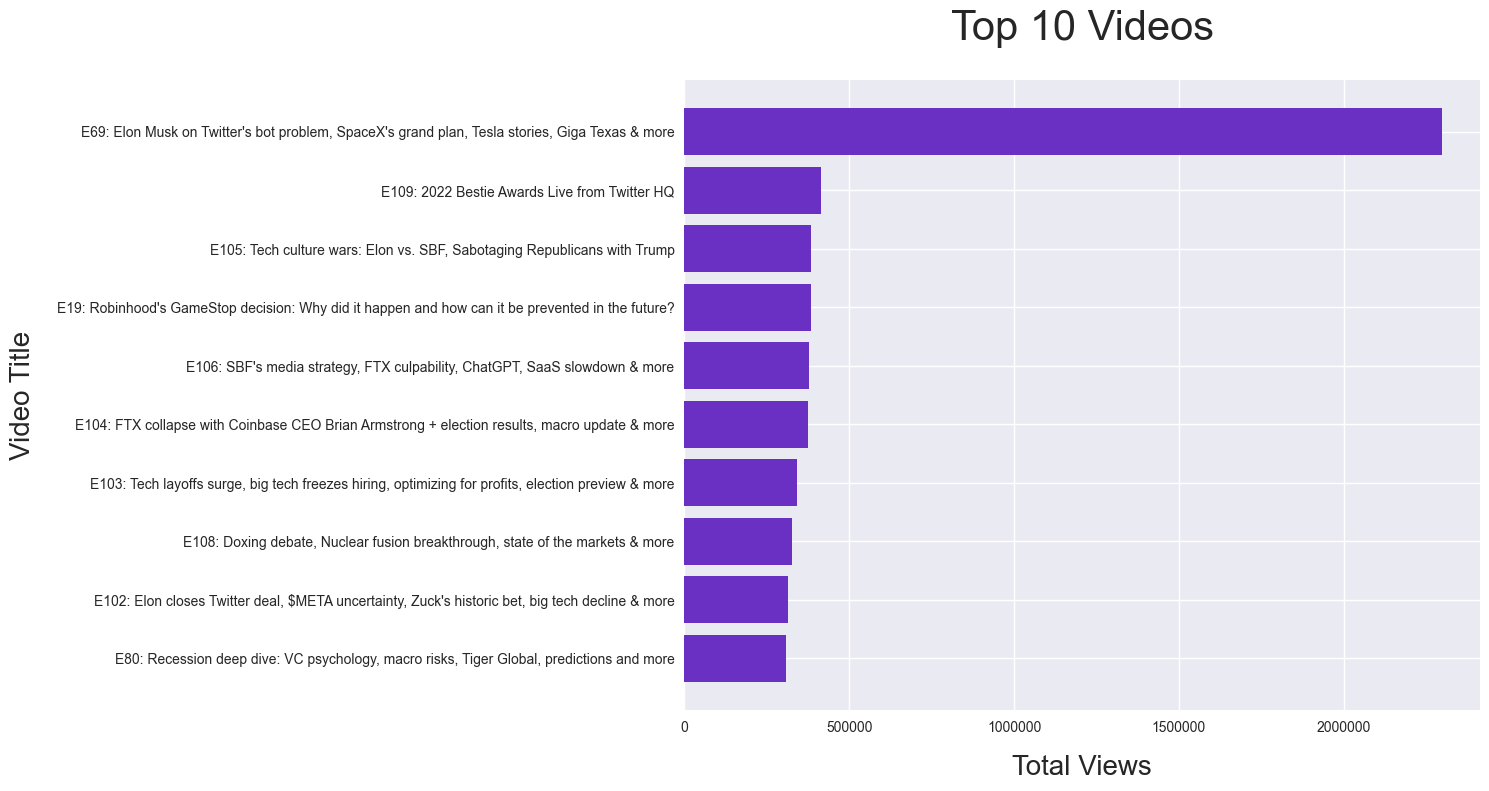

In [6]:

top10 = df.head(10).sort_values(by="views", ascending=True)

plt.figure(figsize=(15,8), dpi=100)
 
# creating the bar plot
plt.ticklabel_format(style='plain')
plt.barh(top10["title"], top10["views"], color=highColor)

plt.title("Top 10 Videos", y=1.05, fontsize=30)

plt.xlabel("Total Views", fontsize=20, labelpad=15)
plt.ylabel("Video Title", fontsize=20, labelpad=15)

plt.tight_layout()
plt.show()

# Top 10 videos with least views

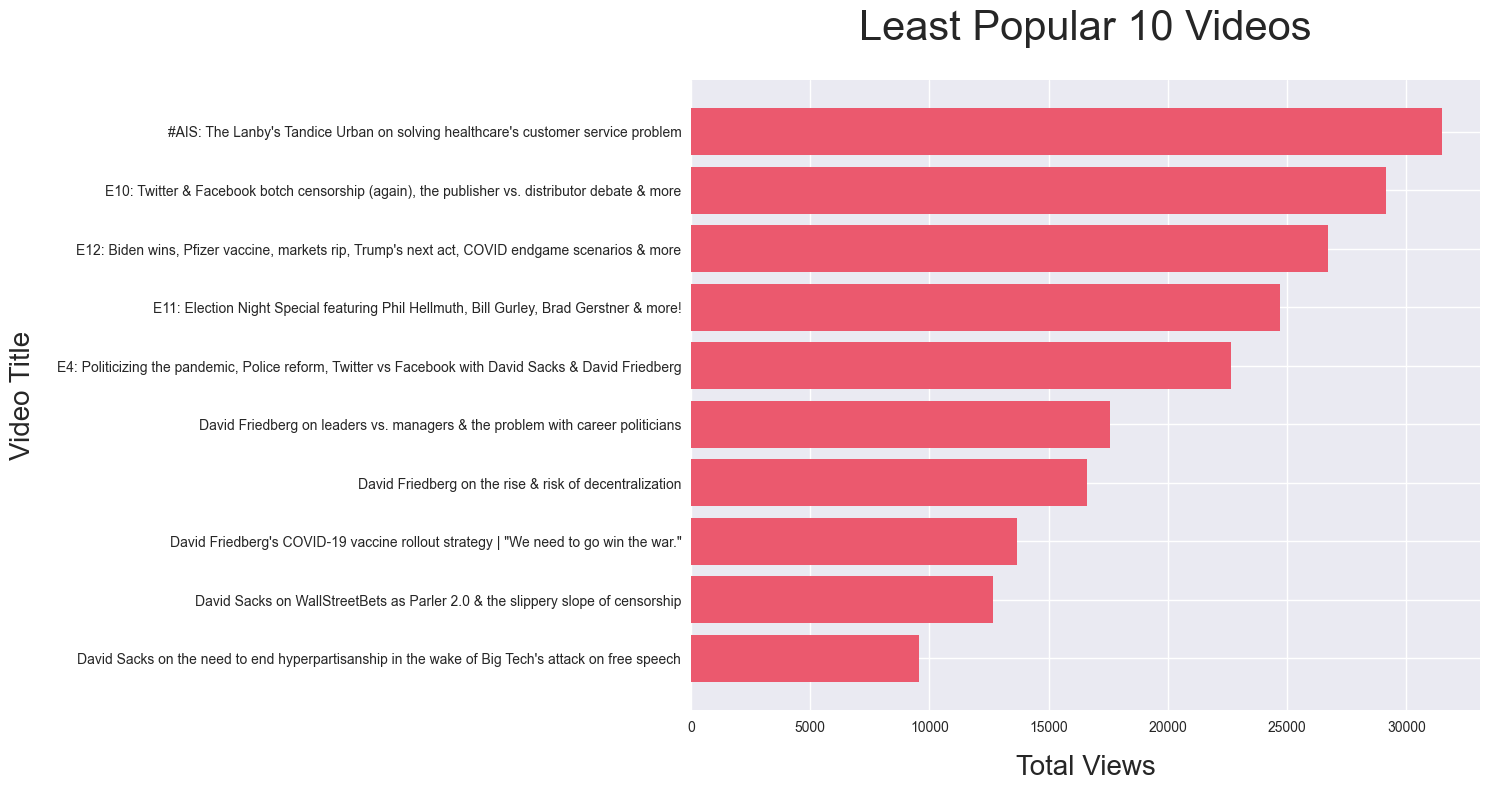

In [7]:
bottom10 = df.tail(10).sort_values(by='views', ascending=True)
plt.figure(figsize=(15,8), dpi=100)
 
# creating the bar plot
plt.ticklabel_format(style='plain')
plt.barh(bottom10["title"], bottom10["views"], color=lowColor)

plt.title("Least Popular 10 Videos", y=1.05, fontsize=30)
plt.xlabel("Total Views", labelpad=15, fontsize=20)
plt.ylabel("Video Title", labelpad=15, fontsize=20)

plt.tight_layout()
plt.show()

# Top 10 Videos with most Comments

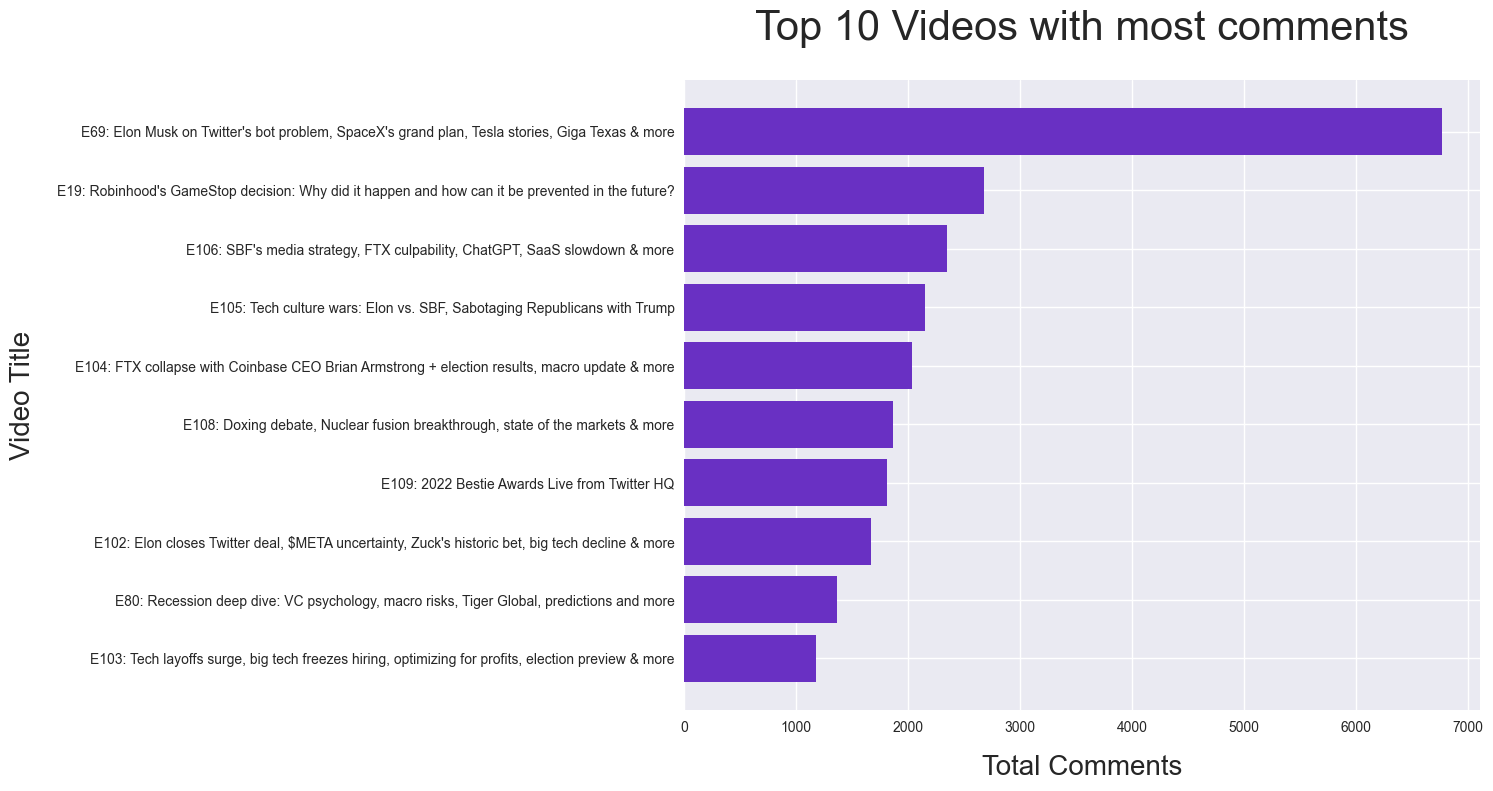

In [8]:
top10_comments = df.head(10).sort_values(by="comments", ascending=True)
# creating the bar plot
plt.figure(figsize=(15,8), dpi=100)

plt.barh(top10_comments["title"], top10_comments["comments"], color=highColor)

plt.title("Top 10 Videos with most comments", fontsize=30, y=1.05)
plt.xlabel("Total Comments", fontsize=20, labelpad=15)
plt.ylabel("Video Title", fontsize=20, labelpad=15)


plt.tight_layout()
plt.show()

# Top 10 Videos with the Least Comments

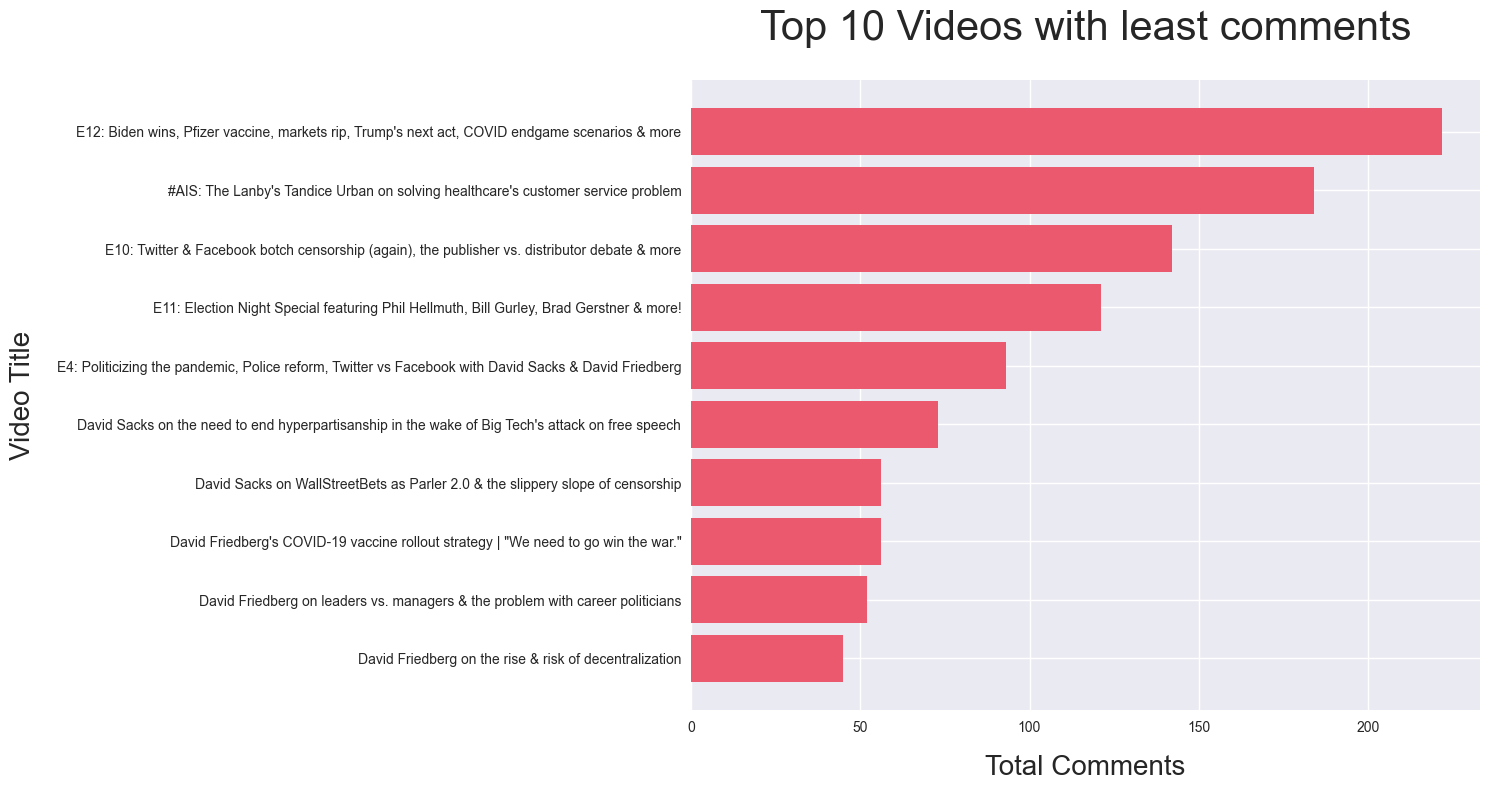

In [9]:
bottom10_least_comments = df.tail(10).sort_values(by="comments", ascending=True)
# creating the bar plot
plt.figure(figsize=(15,8), dpi=100)

plt.ticklabel_format(style='plain')
plt.barh(bottom10_least_comments["title"], bottom10_least_comments["comments"], color=lowColor)

plt.title("Top 10 Videos with least comments", fontsize=30, y=1.05)

plt.xlabel("Total Comments", fontsize=20, labelpad=15)
plt.ylabel("Video Title", fontsize=20, labelpad=15)

plt.tight_layout()
plt.show()

# Top 10 Videos with the most Likes


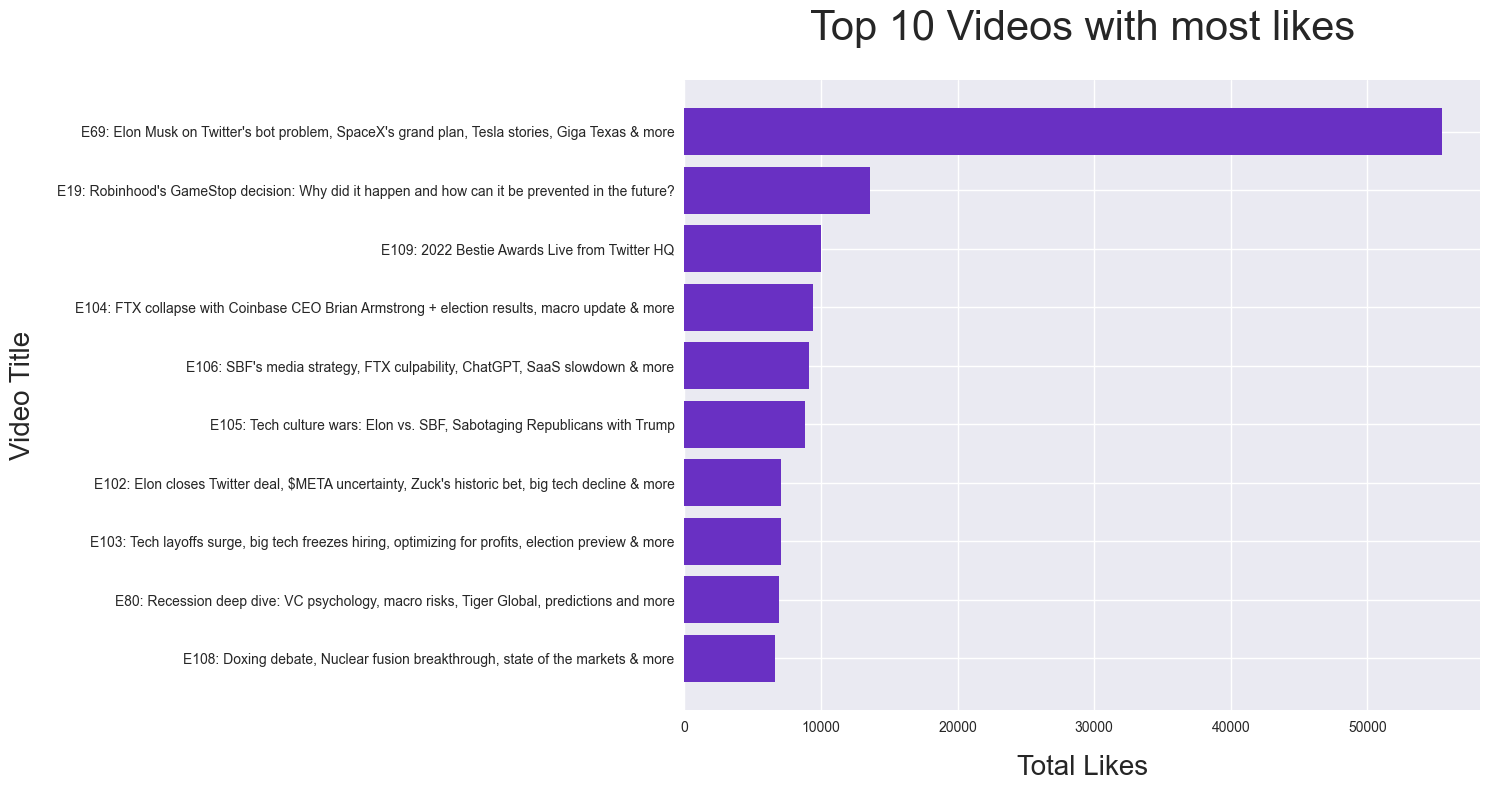

In [10]:
top10_likes = df.head(10).sort_values(by="likes", ascending=True)
# creating the bar plot
plt.figure(figsize=(15,8), dpi=100)

plt.barh(top10_likes["title"], top10_likes["likes"], color=highColor)

plt.title("Top 10 Videos with most likes", fontsize=30, y=1.05)

plt.xlabel("Total Likes", fontsize=20, labelpad=15)
plt.ylabel("Video Title", fontsize=20, labelpad=15)

plt.tight_layout()
plt.show()

# Top 10 Videos with the least Likes


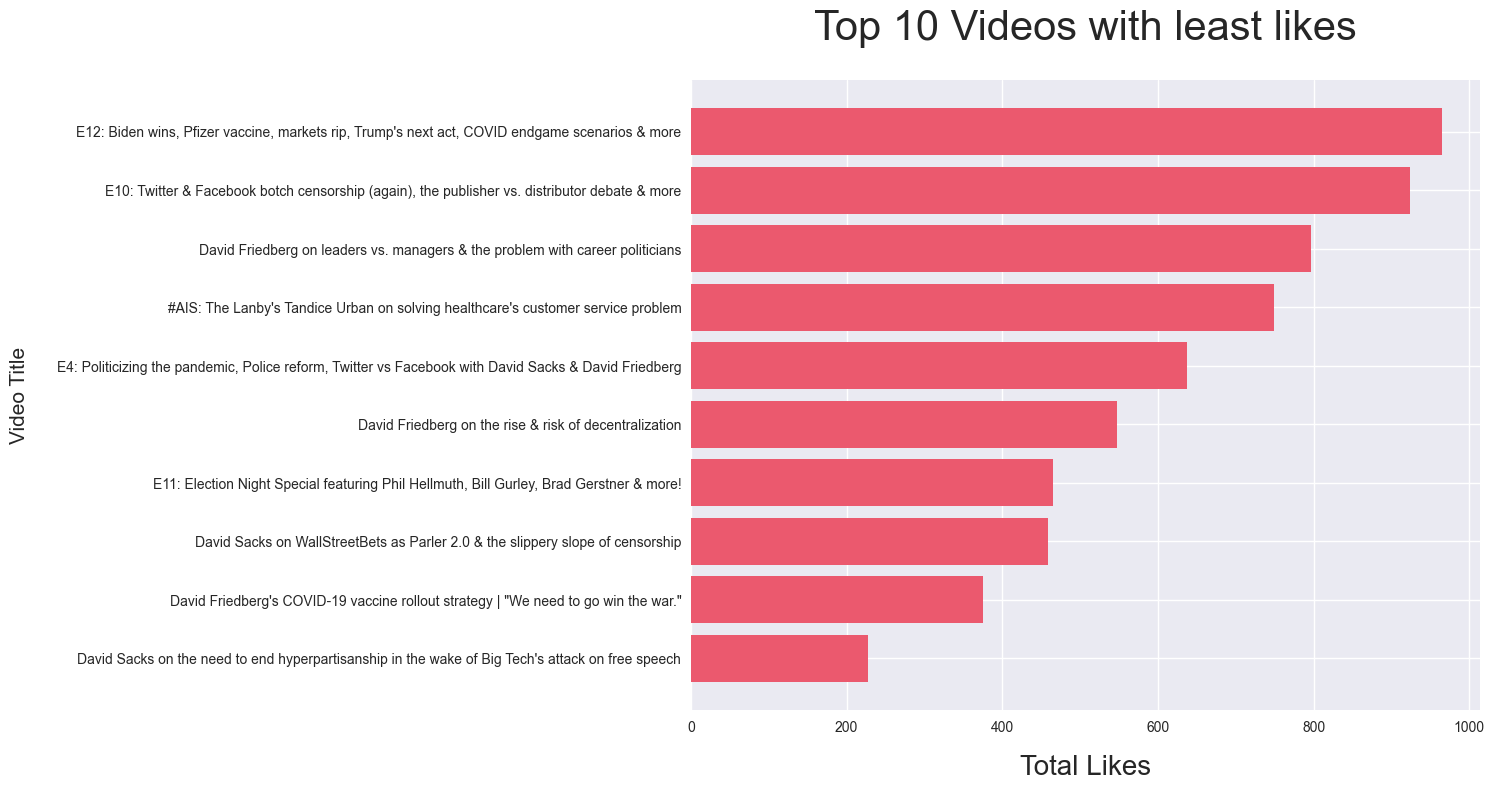

In [11]:
top10_least_likes = df.tail(10).sort_values(by="likes", ascending=True)
# creating the bar plot
plt.figure(figsize=(15,8), dpi=100)

plt.ticklabel_format(style='plain')
plt.barh(top10_least_likes["title"], top10_least_likes["likes"], color=lowColor)

plt.title("Top 10 Videos with least likes", fontsize=30, y=1.05)
plt.xlabel("Total Likes",fontsize=20, labelpad=15)
plt.ylabel("Video Title", labelpad=20, fontsize=15)

plt.tight_layout()
plt.show()

# Popular Tags

In [12]:
# Elon Search
elon = df[df['title'].str.contains('Elon')]
elon_avg_views = round(int(elon["views"].mean()),2)
elon_avg_likes = round(int(elon["likes"].mean()),2)
elon_avg_comments = round(int(elon["comments"].mean()),2)

tag_hits = len(elon["title"])

print(f"Titles with this tag: {tag_hits}")
print(f"\nElon tag stats\n \nAverage Views: {elon_avg_views:,} \nAverage Likes: {elon_avg_likes:,}\
\nAverage Comments: {elon_avg_comments:,}")

Titles with this tag: 6

Elon tag stats
 
Average Views: 587,479 
Average Likes: 14,322
Average Comments: 2,151


In [13]:
# Biden Search
biden = df[df['title'].str.contains('Biden')]
biden_avg_views = round(int(biden["views"].mean()),2)
biden_avg_likes = round(int(biden["likes"].mean()),2)
biden_avg_comments = round(int(biden["comments"].mean()),2)

tag_hits = len(biden["title"])

print(f"Titles with this tag: {tag_hits}")
print(f"\nBiden tag stats\n \nAverage Views: {biden_avg_views:,} \nAverage Likes: {biden_avg_likes:,}\
\nAverage Comments: {biden_avg_comments:,}")

Titles with this tag: 5

Biden tag stats
 
Average Views: 135,786 
Average Likes: 3,210
Average Comments: 817


In [14]:
# politics Search
pols = df[df['title'].str.contains('politic')]
pol_avg_views = round(float(pols["views"].mean()),2)
pol_avg_likes = round(float(pols["likes"].mean()),2)
pol_avg_comments = round(float(pols["comments"].mean()),2)

tag_hits = len(pols["title"])

print(f"Titles with this tag: {tag_hits}")
print(f"\nPolitics tag stats\n \nAverage Views: {pol_avg_views:,} \nAverage Likes: {pol_avg_likes:,}\
\nAverage Comments: {pol_avg_comments:,}")

Titles with this tag: 8

Politics tag stats
 
Average Views: 130,815.25 
Average Likes: 3,598.88
Average Comments: 651.88


# Summary Stats Using pandas-profiling

In [15]:
profile = ProfileReport(df, title="Allin YT Channel", html={'style':{'full_width':True}})

In [22]:
df

,title,views,likes,comments,date
0,"E69: Elon Musk on Twitter's bot problem, Space...",2297902,55466,6769,2022-05-16 23:33:49+00:00
1,E109: 2022 Bestie Awards Live from Twitter HQ,413627,10009,1807,2022-12-24 08:18:00+00:00
2,"E105: Tech culture wars: Elon vs. SBF, Sabotag...",385548,8844,2152,2022-11-19 10:40:36+00:00
3,E19: Robinhood's GameStop decision: Why did it...,384055,13575,2681,2021-01-30 02:28:05+00:00
4,"E106: SBF's media strategy, FTX culpability, C...",377767,9104,2346,2022-12-03 10:22:48+00:00
...,...,...,...,...,...
126,David Friedberg on leaders vs. managers & the ...,17564,797,52,2021-01-30 22:02:44+00:00
127,David Friedberg on the rise & risk of decentra...,16627,547,45,2021-01-30 22:28:01+00:00
128,David Friedberg's COVID-19 vaccine rollout str...,13653,375,56,2021-01-08 19:08:43+00:00
129,David Sacks on WallStreetBets as Parler 2.0 & ...,12654,458,56,2021-01-30 22:39:04+00:00


# Split Date column into date and time

In [24]:
df

,title,views,likes,comments,timestamp
0,"E69: Elon Musk on Twitter's bot problem, Space...",2297902,55466,6769,2022-05-16 23:33:49+00:00
1,E109: 2022 Bestie Awards Live from Twitter HQ,413627,10009,1807,2022-12-24 08:18:00+00:00
2,"E105: Tech culture wars: Elon vs. SBF, Sabotag...",385548,8844,2152,2022-11-19 10:40:36+00:00
3,E19: Robinhood's GameStop decision: Why did it...,384055,13575,2681,2021-01-30 02:28:05+00:00
4,"E106: SBF's media strategy, FTX culpability, C...",377767,9104,2346,2022-12-03 10:22:48+00:00
...,...,...,...,...,...
126,David Friedberg on leaders vs. managers & the ...,17564,797,52,2021-01-30 22:02:44+00:00
127,David Friedberg on the rise & risk of decentra...,16627,547,45,2021-01-30 22:28:01+00:00
128,David Friedberg's COVID-19 vaccine rollout str...,13653,375,56,2021-01-08 19:08:43+00:00
129,David Sacks on WallStreetBets as Parler 2.0 & ...,12654,458,56,2021-01-30 22:39:04+00:00


In [30]:
df['date'] = pd.to_datetime(df['timestamp']).dt.date
df['time'] = pd.to_datetime(df['timestamp']).dt.time

In [31]:
df

,title,views,likes,comments,timestamp,date,time
0,"E69: Elon Musk on Twitter's bot problem, Space...",2297902,55466,6769,2022-05-16 23:33:49+00:00,2022-05-16,23:33:49
1,E109: 2022 Bestie Awards Live from Twitter HQ,413627,10009,1807,2022-12-24 08:18:00+00:00,2022-12-24,08:18:00
2,"E105: Tech culture wars: Elon vs. SBF, Sabotag...",385548,8844,2152,2022-11-19 10:40:36+00:00,2022-11-19,10:40:36
3,E19: Robinhood's GameStop decision: Why did it...,384055,13575,2681,2021-01-30 02:28:05+00:00,2021-01-30,02:28:05
4,"E106: SBF's media strategy, FTX culpability, C...",377767,9104,2346,2022-12-03 10:22:48+00:00,2022-12-03,10:22:48
...,...,...,...,...,...,...,...
126,David Friedberg on leaders vs. managers & the ...,17564,797,52,2021-01-30 22:02:44+00:00,2021-01-30,22:02:44
127,David Friedberg on the rise & risk of decentra...,16627,547,45,2021-01-30 22:28:01+00:00,2021-01-30,22:28:01
128,David Friedberg's COVID-19 vaccine rollout str...,13653,375,56,2021-01-08 19:08:43+00:00,2021-01-08,19:08:43
129,David Sacks on WallStreetBets as Parler 2.0 & ...,12654,458,56,2021-01-30 22:39:04+00:00,2021-01-30,22:39:04


# Published hour vs total views

In [51]:
hour = df.groupby([df['timestamp'].dt.hour]).views.sum().sort_values(ascending=False)

In [52]:
hour


timestamp
6     2903057
23    2337614
8     2321044
2     2144694
4     2128246
5     1856561
9     1705857
10    1557395
3     1278874
7     1105777
11     772555
1      419666
18     335444
0      304113
15     259603
19     252364
20     184894
12     150925
22      93886
13      52031
21      39006
17      32330
Name: views, dtype: int64

## Popular Hour Time


- 6 PM
- 12 PM
- 8 AM
- 2 AM
- 4 AM